<p style="text-align: center; font-size: 300%"> Unterjährige Verzinsung </p>


# Vorbemerkungen
* Bitte installieren Sie __JETZT__ die Studentenversion der [Socrative](https://socrative.com/) Clicker App aus dem App-Store Ihres Mobiltelefons.
* Diese Folien bestehen aus einem [Jupyter Notebook](https://jupyter.org/). Sie enthalten lauffähigen Pythoncode.
* Sie sind zum Download verfügbar unter https://github.com/s-broda/ifz/ oder können unter https://notebooks.azure.com/s-broda/projects/pres-ifz direkt im Browser ausgeführt werden (erfordert kostenlosen Microsoft-Account). Klicken Sie auf `Clone` in der oberen rechten Ecke, dann auf `slides.ipynb`.



# Inhalt
* Recap
* Motivation
* Unterjährige Verzinsung
* Annuitätenrechnung bei unterjähriger Verzinsung


# Recap Tilgungsrechnung
* __Annahmen__: Barkredit von CHF $K_0$ über $n$ Jahre zum jährlichen Zinssatz $i$.
* __Einmaltilgung__: Rückzahlung des gesamten Kredits nebst Zins und Zinseszins zum Fälligkeitsdatum $n$:
$$K_n=K_0 (1+i)^n$$
* __Annuitätentilgung__: gleichbleibende jährliche Raten in Höhe von
$$ r=K_0q^n\frac{q-1}{q^n-1}, \quad q:=1+i.  \tag{*}$$
* Intuition: Zahlungsprofil entspricht einer ewigen Rente i. H. v. $r$ mit erster Zahlung nach einem Jahr, abzgl. einer ewigen Rente mit erster Zahlung nach $n+1$ Jahren. Beispiel mit $n=5$:

|Periode | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |...|  
|--------|---|---|---|---|---|---|---|---|---|---|
| $\mbox{}$      | r | r | r | r | r | r | r | r | r |...|
| $\mbox{}$      | 0 | 0 | 0 | 0 |0  |-r |-r |-r |-r |...|
|Saldo   | r | r | r | r | r | 0 | 0 | 0 | 0 |...|

Barwert:
$$
   K_0=\frac{r}{i}-\frac{1}{(1+i)^n}\frac{r}{i}.
$$
Einsetzen und umstellen ergibt (*).

# Beispiel: Einmaltilgung

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed
%matplotlib inline

@interact(K0=(0., 200), i=(0.0, .2, 0.001), n=(0, 30))
def Kj(K0, i, n):
    j = np.arange(1, n+1)
    Kj = K0 * (1 + i) ** j
    plt.plot(j, Kj)
    plt.xlabel('$j$'); plt.ylabel('$K_j$')
    plt.annotate(s='$K_{'+'{}'.format(n)+'}='+'{}$'.format(Kj[-1]), xy=(n, Kj[-1]), xytext=(n/2, Kj[-1]), arrowprops={"arrowstyle": "->"})
    

interactive(children=(FloatSlider(value=100.0, description='K0', max=200.0), FloatSlider(value=0.1, descriptio…

# Beispiel: Annuitätentilgung


In [2]:
def annuity(K0, i, n):
    q = 1 + i; j = np.arange(0, n)
    rate = K0 * (1/n if q == 1 else q**n * (q - 1) / (q**n - 1))  
    zins = K0 * (0 if q == 1 else (q**n - q**j) / (q**n - 1) * i)
    tilgung = rate - zins
    return rate, zins, tilgung

@interact(K0=(1., 100.), i=(-1, 1, 0.1), n=(1, 60))        
def plot_annuities(K0 = 100, i = 0.12, n = 30):
    rate, zins, tilgung = annuity(K0, i, n)
    j = np.arange(1, n + 1)
    p1 = plt.bar(j, zins)
    p2 = plt.bar(j, tilgung, bottom=np.maximum(0, zins))
    p3 = plt.bar(j+.4, rate, width=.4, color="blue")
    plt.legend((p1[0], p2[0], p3[0]), ('Zins', 'Tilgung', 'Rate'))

interactive(children=(FloatSlider(value=100.0, description='K0', min=1.0), FloatSlider(value=0.12, description…

# Clicker-Frage
* Bitte öffnen Sie die Socrative App und treten Sie dem Raum __BRODA173__ bei.
* Sei $K_0=100$ und $n=30$. Wenn der Zinsatz $i=-100\%$ beträgt, dann

   a. tendiert die Tilgung gegen $\infty$.<br>
   b. tendiert der Zins gegen $-\infty$.<br>
   c. lässt sich die Annuität nicht berechnen.<br>
   d. beträgt die jährliche Rate $0$.<br>
   e. beträgt die jährliche Rate $K_0/n$<br>
      


# Unterjährige Verzinsung
## Motivation
* Oben sind wir von _jährlichen_ Raten ausgegangen. Die meisten Kreditverträge (Hypothekendarlehen, Barkredite) sind aber als Annuitätendarlehen mit _monatlicher_ Tilgung ausgeformt.
* Wir können mit den bekannten Formeln weiterrechnen, müssen aber die Sichtweise ändern, indem wir die Zeitperioden als _Monate_ auffassen.
* Dementsprechend ist der zu verwendende Zins der _Monatszins_, für welchen wir $i_{12}$ schreiben. 


    

## Beispiel
* Annahme: Barkredit in Höhe von 100 CHF mit Laufzeit von 12 Monaten, monatlich verzinst zu $i_{12}=1\%$, Einmaltilgung (inkl. aufgelaufener Zinsen) nach 12 Monaten.
* Rückzahlungsbetrag nach 12 Monaten entspricht
$$
100 (1+i_{12})^{12}
$$

In [3]:
100 * (1 + 0.01) ** 12

112.68250301319698

# Clicker-Frage
* Bitte öffnen Sie die Socrative App und treten Sie dem Raum __BRODA173__ bei.
* Wie hoch ist der Jahreszinssatz in obigem Beispiel?

   a. Definitiv zu hoch.<br>
   b. 12%<br>
   c. 12.68%<br>
   d. Weder b noch c sind falsch.<br>
   e. Alle Antworten sind richtig.
   
      


# Lösung
* Fangfrage! Alle Antworten sind richtig; es kommt darauf an, _welcher_ Zins gemeint ist.
* 12% ist der sog. _nominelle Jahreszinssatz_. Er dient als Berechnungsgrundlage für den Monatszins: $i_{12}=\frac{i_{nom}}{12}$
* 12.68% ist der sog. _effektive Jahreszinssatz_: derjenige Jahreszins, der zum gleichen Rückzahlungsbetrag führt wie unterjährige Verzinsung zum Monatszins $i_{12}$, also:

$$100(1+i_{eff})=100(1+i_{12})^{12}=112.68 \Leftrightarrow i_{eff}=12.68\%.$$
* Die Differenz von $0.68\%$ resultiert aus dem Zinseszins auf die unterjährigen Zinszahlungen.

# Allgemeiner Fall
* Auch andere unterjährige Zinsperioden sind denkbar (z. B. halb- oder vierteljährlich). Allgemein teilen wir das Jahr in $m$ Zinsperioden (engl. compounding periods) auf und schreiben $i_m=\frac{i_{nom}}{m}$ für den entsprechenden Zins.
* Dann gilt 
$$1+i_{eff}=\left(1+\frac{i_{nom}}{m}\right)^m \Leftrightarrow i_{eff}=\left(1+\frac{i_{nom}}{m}\right)^m-1.$$
* Umgekehrt gilt 
$$ i_{nom}=m\left(\sqrt[m]{1+i_{eff}}-1\right).$$

# Randbemerkung für mathematisch Interessierte
* Für grosses $m$ konvergiert $(1+{i_{nom}}/{m})^m$ gegen die Exponentialfunktion:
$$\lim_{m\rightarrow\infty}\left(1+\frac{i_{nom}}{m}\right)^m=e^{i_{nom}}$$
sodass
$$
(1+i_{eff})^n=e^{n\cdot i_{nom}}
$$
* In diesem Fall spricht man von stetiger Verzinsung (continuous compounding).

In [4]:
@interact(K0=fixed(100), i=(0.0, .5, 0.01), m=(1, 12), n=(1, 100))
def K1(K0=100, i=0.12, m=1, n=30):    
    j = np.arange(0, n * m + 1); Kj = K0 * (1 + i / m) ** j    
    p1 = plt.step(j, Kj, where='post', color='red'); p2 = plt.plot(j, K0*np.exp(i*j/m))
    plt.xlabel('$j$'); plt.ylabel('$K_j$');
    plt.title("Value after {} year(s), interest compounded {} time(s) per year".format(n, m)); plt.legend(('discrete compounding', 'continuous compounding'))

interactive(children=(FloatSlider(value=0.12, description='i', max=0.5, step=0.01), IntSlider(value=1, descrip…

# Übungsaufgaben
* Bitte öffnen Sie die Socrative App und treten Sie dem Raum __BRODA173__ bei.
* Für diese Fragen müssen Sie Ihren Namen eingeben und das numerische Ergebnis im Format xx.xx% angeben, gerundet auf zwei Nachkommastellen.
* Zur Berechnung dürfen Sie den Taschenrechner verwenden.

  1. Sei $m=2$ und $i_{eff}=12$%. Berechnen Sie $i_{nom}$.
  2. Sei $m=4$ und $i_{nom}=12$%. Berechnen Sie $i_{eff}$.
      


# Lösung
1.

In [5]:
i_nom = 2 * (np.sqrt(1 + 0.12)-1)

2.

In [6]:
i_eff = (1 +  0.12 / 4) ** 4 - 1

# Annuitätenrechnung bei unterjähriger Verzinsung
* Auch bei monatlich getilgten Annuitätendarlehen können wir die bestehenden Formeln weiterverwenden, vorausgesetzt wir rechnen mit dem monatlichen Zins:

$$r=K_0q^n\frac{q-1}{q^n-1}, \quad q:=1+i_{12}=1+\frac{i_{nom}}{12}.$$

* Beispiel: Annuitätendarlehen i. H. v. CHF 20'000, Laufzeit 30 Monate, nomineller Jahreszinssatz 9%, damit Monatszinssatz 0.75%.
* Wir betrachten eine vereinfachte Version unserer Funktion `annuity`, die nur die monatliche Rate retourniert:
    

In [7]:
def annuity(K0, i, n):
    q = 1 + i
    rate = K0 * (q**n * (q - 1) / (q**n - 1))  
    return rate

* Ergebnis:

In [8]:
annuity(20_000, 0.0075, 30)

746.9632151166078

* Der effektive Jahreszins beträgt

In [9]:
(1 + .09 / 12) ** 12 - 1

0.09380689767098382

# Berechnung des Zinses
* Es ist auch möglich die Annuitätenformel für gegebenes $K_0$ und $r$ nach dem Zins zu lösen, jedoch nicht in geschlossener Form.
* Das Problem ist aber einfach numerisch zu lösen, da die Zielfunktion $K_0q^n(q-1)(q^n-1)-r=0\,$ näherungsweise linear ist:


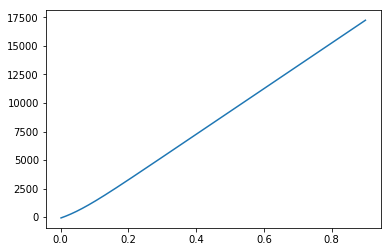

In [10]:
objective = lambda i: annuity(20_000, i, 30) - 746.9632151166078
x = np.arange(.001, 0.9, 0.00001)
plt.plot(x, objective(x));

* Numerisches Lösen ergibt

In [11]:
from scipy.optimize import newton
newton(objective, 0.005) # zweites Argument ist der Startwert

0.007500000000000045

* Das Problem lässt sich auch mit dem Solver auf dem Taschenrechner lösen: dafür löst man die Gleichung
    `20000X^30*(X-1)/(X^30-1)-746.96` nach `X`. `X` entspricht dann $q=1+i_{12}$.

# Bemerkung
* Sowohl das Schweizer KKG als auch die PAngV der EU verlangen, dass bei Konsumentenkrediten der effektive Zinssatz inklusive aller Nebenkosten angegeben wird. In der Schweiz darf dieser derzeit nicht mehr als 10% betragen.
* Definiert ist der Effektivzins als der interne Zinsfuss der Zahlungsreihe aller relevanten cash flows, also derjenige Zinssatz, für den der Barwert (die Summe aller abgezinsten Zahlungen) dem Kreditbetrag entspricht.
* Für kompliziertere als die hier betrachteten Verträge lässt dieser sich nur numerisch berechnen. Wir können aber überprüfen ob unser oben berechneter Effektivzins korrekt ist:

In [12]:
j = np.arange(1, 31)
d = (1 + 0.09380689767098382 ) ** (-j / 12)
746.9632151166078 * np.sum(d)

20000.000000000007

# Übungsaufgaben
* Bitte öffnen Sie die Socrative App und treten Sie dem Raum __BRODA173__ bei.
* Für diese Fragen müssen Sie Ihren Namen eingeben und das numerische Ergebnis im Format xx.xx% angeben, gerundet auf zwei Nachkommastellen.
* Zur Berechnung dürfen Sie den Taschenrechner verwenden. 
* Für die folgenden Fragen sei ein monatlich zu tilgendes Annuitätendarlehen i. H. v. CHF 3'000 mit Laufzeit 2 Jahre gegeben.

  1. Berechnen Sie die monatliche Rate unter der Annahme eines nominellen Jahreszinssatzes von 8%. 
  2. Die monatliche Rate betrage nun CHF 140. Berechnen Sie den effektiven Jahreszinssatz.
 
 
      



# Lösung:
1.

In [13]:
r = annuity(3_000, 0.08/12, 24)

2.

In [14]:
i_12 = newton(lambda i: annuity(3_000, i, 24) - 140, 0.08)
i_eff = (1 + i_12) ** 12 - 1 

# Was Sie nach der heutigen Lektion beherrschen sollten
* Nominelle und effektive Zinssätze unterscheiden und umrechnen.
* Zinssätze und Monatsraten mit Taschenrechner und Software berechnen.

# Exit poll
* Bitte öffnen Sie die Socrative App und treten Sie dem Raum BRODA173 bei.
* Zu welchem Teil konnten Sie der heutigen Lektion folgen?
   
   a. 90-100%<br>
   b. 75-90%<br>
   c. 50-75%<br>
   d. 25-50%<br>
   e. 0-25%
